In [58]:
###################
# import libraries
###################

import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
######################
# Web scraping Reviews
######################

# Define the URL of the Amazon product page
url = 'https://www.amazon.com/Lenovo-Backpack-15-6-Inch-Water-Repellent-GX40Q17227/dp/B075Y6SRMG/ref=sr_1_6?crid=2BT39M5C6E32H&dib=eyJ2IjoiMSJ9._LijSsKfbbodSocw8Nc0K7lSNpHldmNCuUqrxcHK9XIGhcydvERFJxEKJ8bgz5BDBE1t4MpHwgb6W2B_Wp2wDQ_-QzfwTdip2laKKYpURDqoNvD8YVvFZsGJIjTk52Bov4x6AlRsY6g31uoHN8FqiNXlCvW7YYhEbBc4C4AJwAmxNxgI3hxMIt9MR21lYBAl5c-gJGgeOdNcf0eSrxvYJ_2D2WoHn_rt0h3Wly1h4tkc3-GesLJ2Wp4Q3Xt4jiUvMllkmPiPiNJEhgNPiz8meNtddGidbhSNDKVIDoUnmuc.577Wqs69l7D3clALognB_DP2nYx2gWhSglP2p-ecAkY&dib_tag=se&keywords=Bag&qid=1708446165&sprefix=%2Caps%2C2903&sr=8-6&th=1'

# Send HTTP request to the Amazon product page
response = requests.get(url)

# Parse HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the container for all the reviews
reviews_container = soup.find_all('div', class_='a-section review aok-relative')

# Check if any reviews were found
if reviews_container:
    print("Number of reviews found:", len(reviews_container))
    # Create a list to store the review data
    review_data = []
    # Iterate over each review and store its text
    for review in reviews_container:
        # Try to find the review text with different classes
        review_text = review.find('span', class_='review-text-content')
        if not review_text:
            review_text = review.find('span', class_='review-text')
        if review_text:
            review_data.append(review_text.get_text(strip=True))
        else:
            review_data.append("Review text not found for this review")
    # Write the review data to a CSV file
    with open('amazon_reviews.csv', 'w', newline='', encoding='utf-8') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Review Text'])
        for review_text in review_data:
            csv_writer.writerow([review_text])
    print("Reviews saved to 'amazon_reviews.csv' file.")
else:
    print("No reviews found on the page.")

# Load the CSV file into a DataFrame
df = pd.read_csv('amazon_reviews.csv')

# Display the DataFrame
print(df.head())


Number of reviews found: 6
Reviews saved to 'amazon_reviews.csv' file.
                                         Review Text
0  I really like this backpack. Suits my need per...
1  Wanted something inexpensive, clean, looking, ...
2  I like this backpack. Plenty of room for your ...
3  This is better than you would expect for an $1...
4  As a tech enthusiast, I'm always on the lookou...


In [60]:
#################
# Data Cleaning
#################


# Function for cleaning text
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Remove any additional punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

# Apply cleaning function to the 'Review Text' column
df['Cleaned Text'] = df['Review Text'].apply(clean_text)

# Display the DataFrame with cleaned text
print(df.head())

                                         Review Text  \
0  I really like this backpack. Suits my need per...   
1  Wanted something inexpensive, clean, looking, ...   
2  I like this backpack. Plenty of room for your ...   
3  This is better than you would expect for an $1...   
4  As a tech enthusiast, I'm always on the lookou...   

                                        Cleaned Text  
0  really like backpack suits need perfectly styl...  
1  wanted something inexpensive clean looking bul...  
2  like backpack plenty room laptop school suppli...  
3  better would expect 18 backpack arent going ge...  
4  tech enthusiast im always lookout gear blends ...  


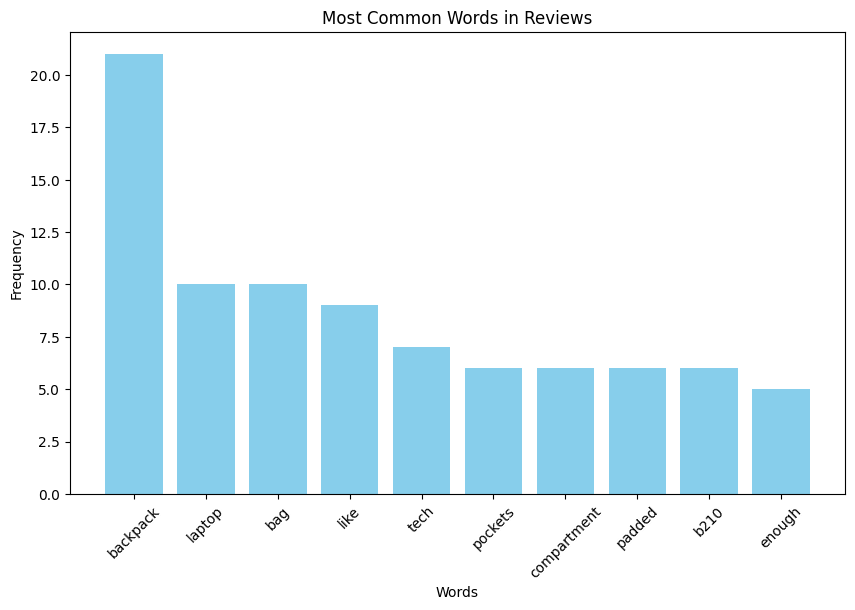

In [61]:
##############################################
# Most Commmon Words in Reviews Visualization
##############################################

# Tokenize the cleaned text into words
words = ' '.join(df['Cleaned Text']).split()

# Count the frequency of each word
word_freq = Counter(words)

# Get the most common words and their frequencies
common_words = word_freq.most_common(10)
common_words = dict(common_words)

# Plot bar plot of most common words
plt.figure(figsize=(10, 6))
plt.bar(common_words.keys(), common_words.values(), color='skyblue')
plt.title('Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [63]:
#####################
# Sentiment Analysis
#####################

# Function for sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Get sentiment polarity (-1 to 1)
    polarity = analysis.sentiment.polarity
    # Classify sentiment as positive, negative, or neutral
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Cleaned Text' column
df['Sentiment'] = df['Cleaned Text'].apply(analyze_sentiment)

# Display the DataFrame with sentiment analysis results
print(df[['Review Text', 'Sentiment']].head())


                                        Cleaned Text Sentiment
0  really like backpack suits need perfectly styl...  Positive
1  wanted something inexpensive clean looking bul...  Positive
2  like backpack plenty room laptop school suppli...  Positive
3  better would expect 18 backpack arent going ge...  Positive
4  tech enthusiast im always lookout gear blends ...  Positive


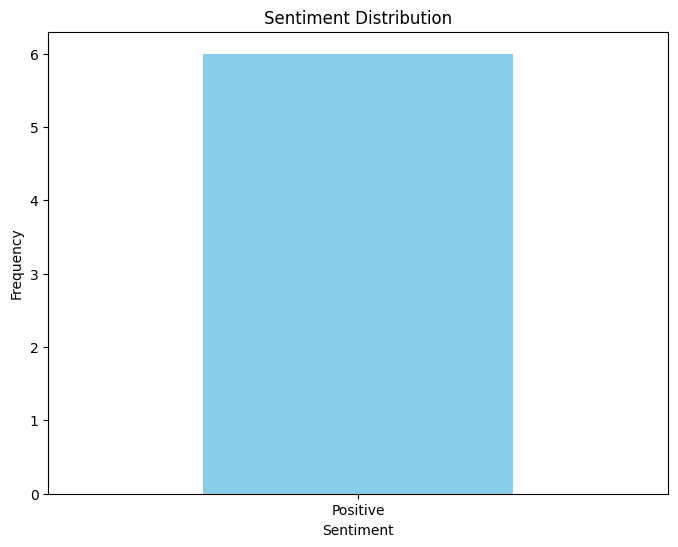

In [64]:
###################################
# Sentiment Analysis Visualization
###################################

# Count the frequency of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot bar plot of sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()